In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
import torch
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.IntegralEquations import IntegralEquations
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
from math import pi

from scipy.special import gamma
from math import pi
from math import sqrt

n_epochs = 10
n_points = 20

# №1 Fredholm's equation

### $$ y(x) = sin(\pi*x) + \frac{1}{2}\int_{0}^1y(t)dt $$ ###

$$ analytical solution: y(x) = sin(\pi x) + \frac{2}{\pi} $$

In [3]:
true_solution = lambda x_var: torch.sin(pi * x_var) + 2 / pi
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) -
                                            torch.sin(pi * curr_v) - 0.5 * IntegralEquations.FredholmEquation1D(
        integration_func,
        nn_model,
        curr_v,
        left_border,
        right_border,
        n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = OneDimensionalMainEquation(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.004899322986602783
Valid max absolute error |Appr(x)-y(x)|: 0.003607451915740967
MAPE on train data: 0.13027553213760257 %
MAPE on validation data: 0.1197753706946969 %
Max residual square loss on train at last epoch: 0.0054168701171875 


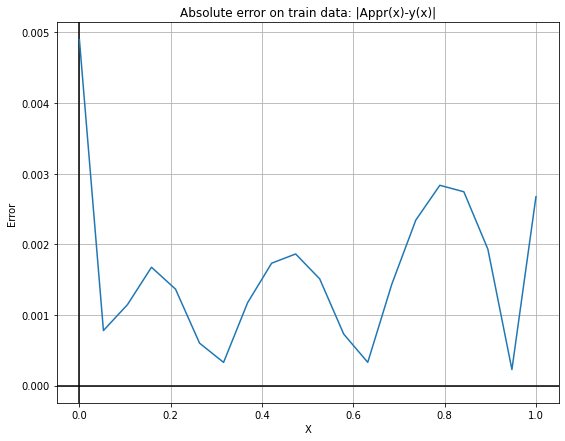

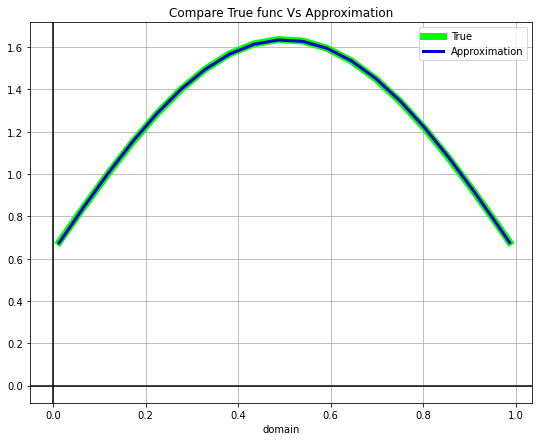

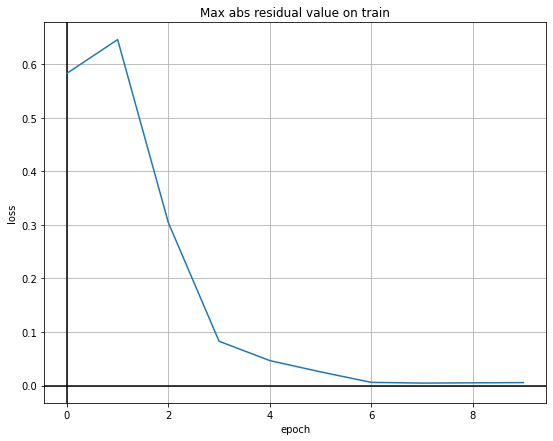

In [4]:
report = ReportMaker(
        true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, n_epochs
    )
report.make_report()

In [5]:
report.print_comparison_table()

       Input  Analytical       ANN     Error
0   0.000000    0.636620  0.631720  0.004899
1   0.052632    0.801214  0.800436  0.000778
2   0.105263    0.961319  0.962464  0.001145
3   0.157895    1.112567  1.114242  0.001675
4   0.210526    1.250833  1.252198  0.001365
5   0.263158    1.372344  1.372944  0.000600
6   0.315789    1.473786  1.473459  0.000327
7   0.368421    1.552393  1.551220  0.001173
8   0.421053    1.606020  1.604288  0.001732
9   0.473684    1.633204  1.631341  0.001863
10  0.526316    1.633204  1.631694  0.001510
11  0.578947    1.606020  1.605292  0.000728
12  0.631579    1.552393  1.552721  0.000328
13  0.684211    1.473786  1.475220  0.001434
14  0.736842    1.372344  1.374686  0.002343
15  0.789474    1.250833  1.253668  0.002836
16  0.842105    1.112567  1.115311  0.002744
17  0.894737    0.961319  0.963249  0.001930
18  0.947368    0.801214  0.801440  0.000226
19  1.000000    0.636620  0.633946  0.002674


# № 2

### $$y(x) = \frac{1}{2}\int_{0}^{\frac{\pi}{2}}xsin(t)y(t)dt + sin(x)$$ ### 
### $$true\_sol = sin(x) + \frac{\pi x}{4}$$ ###

In [6]:
true_solution = lambda x_var: torch.sin(x_var) + pi * x_var / 4
left_border = 0
right_border = pi/2
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: curr_v * torch.sin(int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 0.5 * IntegralEquations.FredholmEquation1D(
        integration_func,
        nn_model,
        curr_v,
        left_border,
        right_border,
        n_points) - torch.sin(curr_v))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = OneDimensionalMainEquation(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0020655393600463867
Valid max absolute error |Appr(x)-y(x)|: 0.0019539594650268555
MAPE on train data: 0.09431353537365794 %
MAPE on validation data: 0.09218102786689997 %
Max residual square loss on train at last epoch: 0.0010756850242614746 


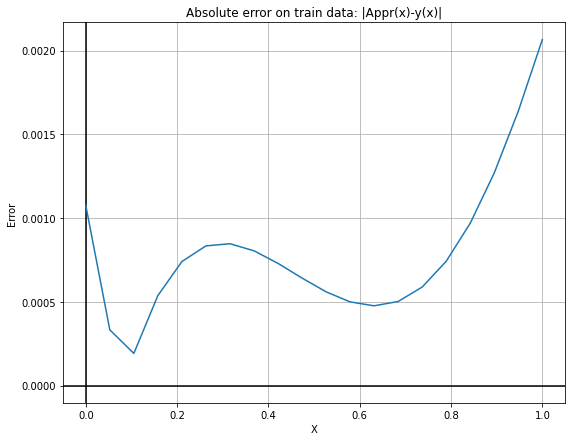

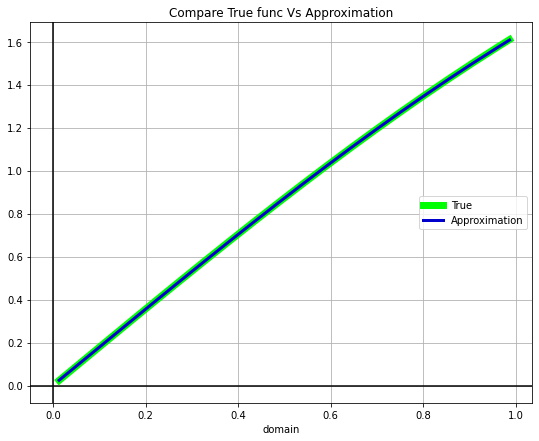

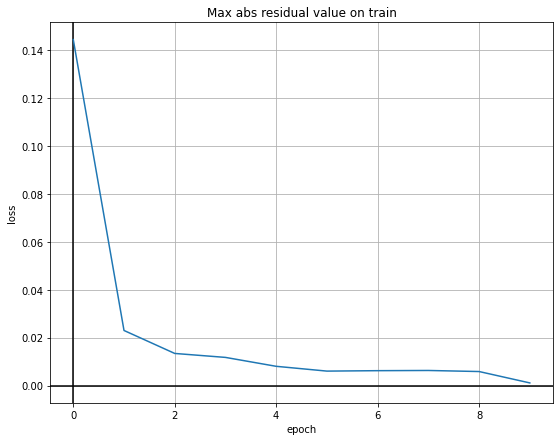

In [7]:
report = ReportMaker(
        true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, n_epochs
    )
report.make_report()

#  № 3

### $$ y(x) =  \int_{0}^{1}(\sqrt{xt}y(t)dt + x$$ ###
### $$ true\_sol =  x + \frac{4}{5}\sqrt{x}$$ ###

In [13]:
true_solution = lambda x_var: x_var + torch.sqrt(x_var) * 0.8
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sqrt(curr_v * int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - IntegralEquations.FredholmEquation1D(
        integration_func,
        nn_model,
        curr_v,
        left_border,
        right_border,
        n_points) - curr_v)
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = OneDimensionalMainEquation(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.04483366012573242
Valid max absolute error |Appr(x)-y(x)|: 0.03503549098968506
MAPE on train data: 1.054210901260376 %
MAPE on validation data: 0.866348922252655 %
Max residual square loss on train at last epoch: 0.04483366012573242 


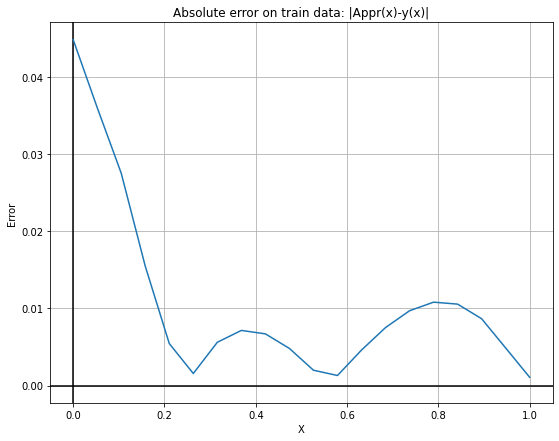

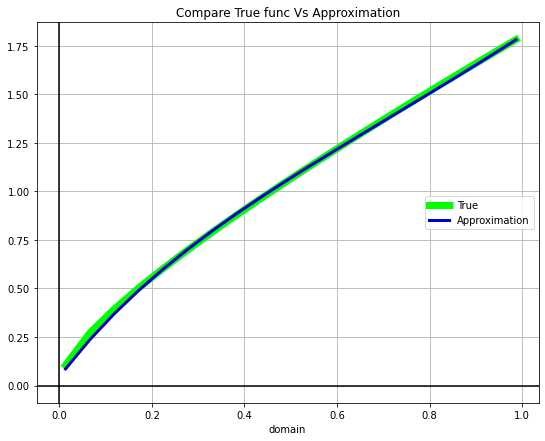

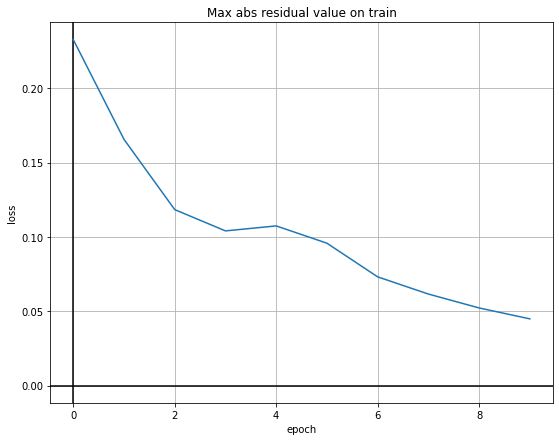

In [14]:
report = ReportMaker(
        true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, n_epochs
    )
report.make_report()

In [8]:
report.print_comparison_table()

       Input  Analytical       ANN     Error
0   0.000000    0.000000  0.001076  0.001076
1   0.052632    0.093944  0.094276  0.000332
2   0.105263    0.187742  0.187551  0.000192
3   0.157895    0.281250  0.280713  0.000537
4   0.210526    0.374322  0.373581  0.000740
5   0.263158    0.466815  0.465981  0.000834
6   0.315789    0.558587  0.557741  0.000847
7   0.368421    0.649500  0.648696  0.000804
8   0.421053    0.739415  0.738686  0.000729
9   0.473684    0.828199  0.827557  0.000642
10  0.526316    0.915719  0.915159  0.000560
11  0.578947    1.001847  1.001348  0.000499
12  0.631579    1.086461  1.085985  0.000476
13  0.684211    1.169439  1.168937  0.000502
14  0.736842    1.250667  1.250079  0.000588
15  0.789474    1.330034  1.329292  0.000742
16  0.842105    1.407435  1.406466  0.000969
17  0.894737    1.482769  1.481500  0.001269
18  0.947368    1.555943  1.554305  0.001638
19  1.000000    1.626869  1.624804  0.002066


# № 4 Volterra's equation

### $$ y(x) = sin(x) + \int_{0}^{x}sin(x-t)y(t)dt$$ ###
### $$ true\_sol =  x $$ ###

$$x \in [0,1]$$

In [4]:
true_solution = lambda x_var: x_var
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sin(curr_v - int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - torch.sin(curr_v) - IntegralEquations.VolterraEquation1D(
        integration_func,
        nn_model,
        curr_v,
        left_border,
        right_border,
        n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = OneDimensionalMainEquation(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0020655393600463867
Valid max absolute error |Appr(x)-y(x)|: 0.0019539594650268555
MAPE on train data: 0.09431353537365794 %
MAPE on validation data: 0.09218102786689997 %
Max residual square loss on train at last epoch: 0.0010756850242614746 


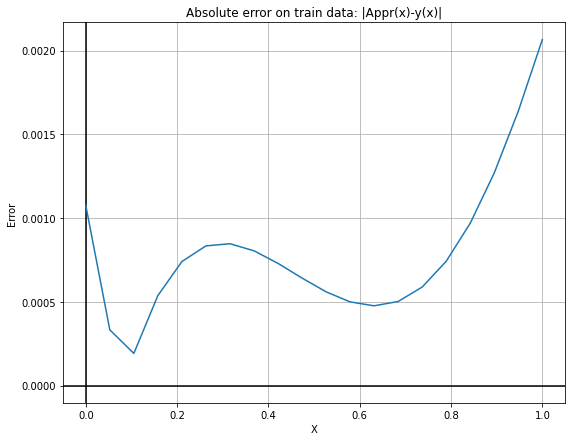

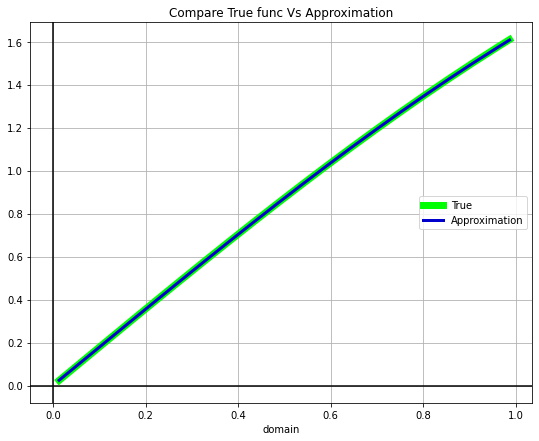

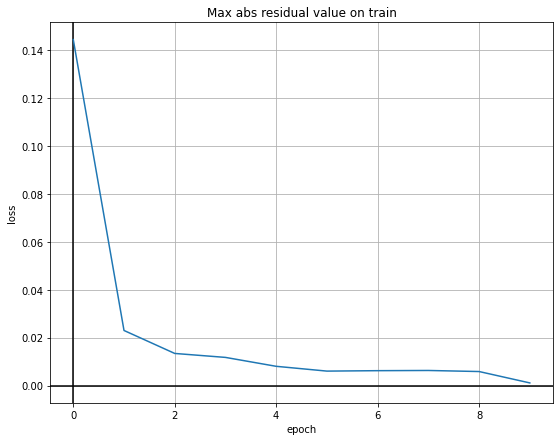

In [9]:
report = ReportMaker(
        true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, n_epochs
    )
report.make_report()

In [11]:
report.print_comparison_table()

       Input  Analytical       ANN     Error
0   0.000000    0.000000  0.001076  0.001076
1   0.052632    0.093944  0.094276  0.000332
2   0.105263    0.187742  0.187551  0.000192
3   0.157895    0.281250  0.280713  0.000537
4   0.210526    0.374322  0.373581  0.000740
5   0.263158    0.466815  0.465981  0.000834
6   0.315789    0.558587  0.557741  0.000847
7   0.368421    0.649500  0.648696  0.000804
8   0.421053    0.739415  0.738686  0.000729
9   0.473684    0.828199  0.827557  0.000642
10  0.526316    0.915719  0.915159  0.000560
11  0.578947    1.001847  1.001348  0.000499
12  0.631579    1.086461  1.085985  0.000476
13  0.684211    1.169439  1.168937  0.000502
14  0.736842    1.250667  1.250079  0.000588
15  0.789474    1.330034  1.329292  0.000742
16  0.842105    1.407435  1.406466  0.000969
17  0.894737    1.482769  1.481500  0.001269
18  0.947368    1.555943  1.554305  0.001638
19  1.000000    1.626869  1.624804  0.002066
